In [1]:
# Gini index: [0,0.5]
# Information Gain:[0,1]
# CART: Classification and regression Tree
# Decision Tree pruning: used to avoid overfitting 

## Problem Statement: Identify either note is Genuine or not using predictive modelling  and with the help of Decision tree

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('banknotes.csv')
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# lets Create input and output data
X = df.drop(columns='Class')
X[:3]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [5]:
y = df['Class']
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [6]:
y.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [7]:
# splitting the dataset
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [9]:
# Import Descision tree algo
#from sklearn.tree import DecisionTreeRegressor

# current problem is binary classification problem
# hence classifier wil be used
from sklearn.tree import DecisionTreeClassifier

In [10]:
model = DecisionTreeClassifier()

In [11]:
#trianing of data
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [12]:
model.classes_

array([0, 1], dtype=int64)

In [13]:
# prediction
y_pred = model.predict(X_test)
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [14]:
y_test[:5].values

array([1, 0, 0, 0, 0], dtype=int64)

In [15]:
# Lets check trianing data score
model.score(X_train,y_train)*100

100.0

In [16]:
model.score(X_test,y_test)*100

97.45454545454545

In [17]:
#performance metrics
from sklearn.metrics import confusion_matrix,classification_report

In [18]:
confusion_matrix(y_test,y_pred)

array([[147,   2],
       [  5, 121]], dtype=int64)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.98      0.96      0.97       126

    accuracy                           0.97       275
   macro avg       0.98      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [20]:
model.criterion

'gini'

In [21]:
# LEst apply entropy
model2 = DecisionTreeClassifier(criterion='entropy')

In [22]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
y_pred2 = model2.predict(X_test)

In [24]:
confusion_matrix(y_test,y_pred2)

array([[146,   3],
       [  3, 123]], dtype=int64)

In [25]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       149
           1       0.98      0.98      0.98       126

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



# DT visualization

In [26]:
from sklearn import tree

In [27]:
X = df.iloc[:,:-1]
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [28]:
X.columns

Index(['Variance', 'Skewness', 'Curtosis', 'Entropy'], dtype='object')

In [29]:
model

DecisionTreeClassifier()

In [30]:
#Build a text report showing the rules of a decision tree.
text_representation = tree.export_text(model,feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'])
print(text_representation)

|--- Variance <= 0.32
|   |--- Skewness <= 7.57
|   |   |--- Variance <= -0.46
|   |   |   |--- Curtosis <= 6.22
|   |   |   |   |--- class: 1
|   |   |   |--- Curtosis >  6.22
|   |   |   |   |--- Skewness <= -4.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Skewness >  -4.67
|   |   |   |   |   |--- Skewness <= -2.24
|   |   |   |   |   |   |--- Entropy <= -1.38
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Entropy >  -1.38
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Skewness >  -2.24
|   |   |   |   |   |   |--- class: 0
|   |   |--- Variance >  -0.46
|   |   |   |--- Skewness <= 5.44
|   |   |   |   |--- Curtosis <= 4.84
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Curtosis >  4.84
|   |   |   |   |   |--- class: 0
|   |   |   |--- Skewness >  5.44
|   |   |   |   |--- class: 0
|   |--- Skewness >  7.57
|   |   |--- Variance <= -4.73
|   |   |   |--- class: 1
|   |   |--- Variance >  -4.73
|   |   |   |--- class: 

In [31]:
import matplotlib.pyplot as plt

In [32]:
np.unique(y)

array([0, 1], dtype=int64)

In [33]:
model.classes_

array([0, 1], dtype=int64)

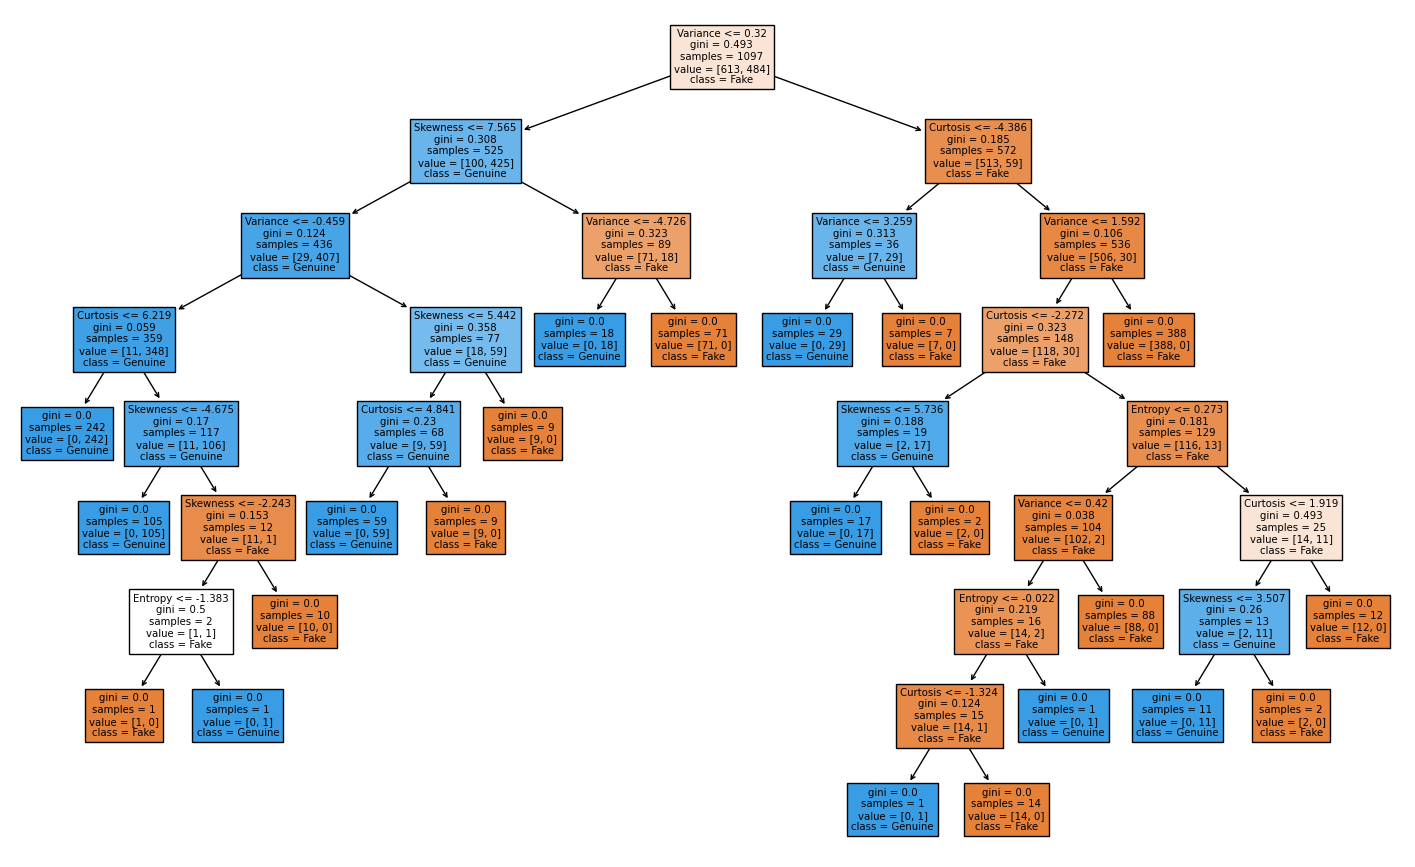

In [34]:
fig = plt.figure(figsize=(18,11))
_ = tree.plot_tree(model, 
                   feature_names=['Variance', 'Skewness', 'Curtosis', 'Entropy'],  
                   class_names=['Fake','Genuine'],
                   filled=True)
plt.savefig('sample_new.png')

In [35]:
len(X_train)

1097

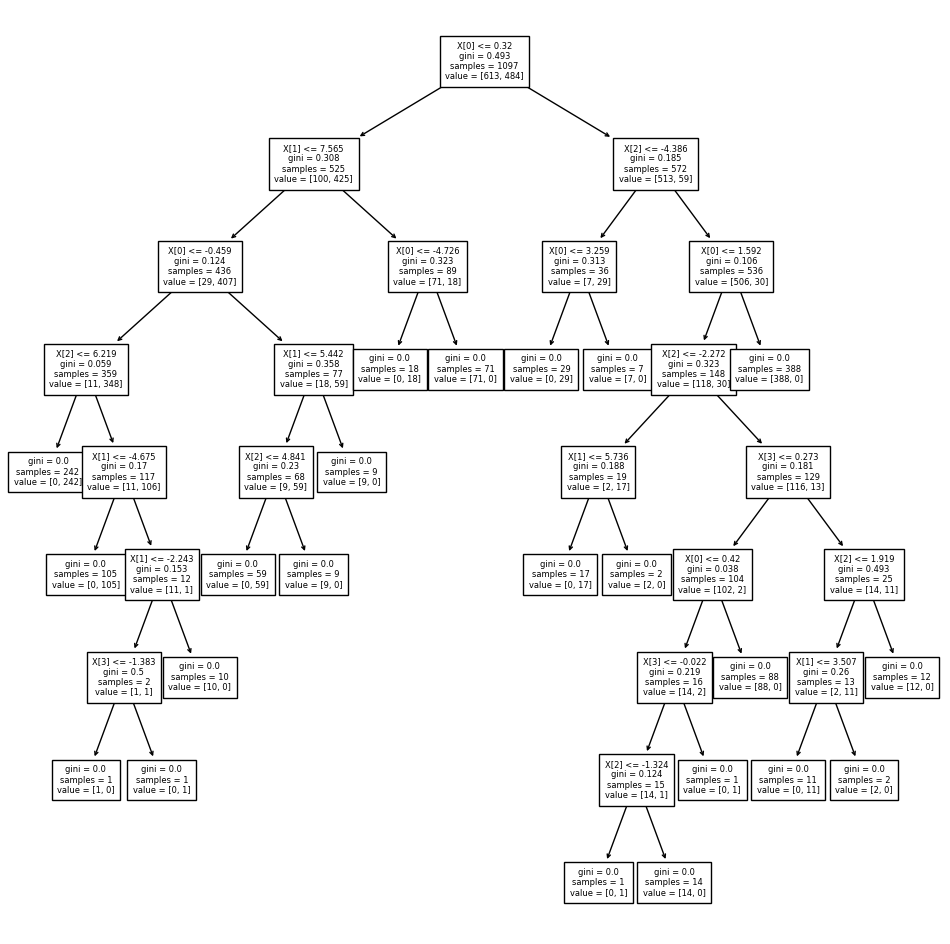

In [36]:
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=6)
plt.savefig('tree_high_dpi', dpi=100)

# Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score

In [38]:
cross_val_score?

In [39]:
# different scoring options
#https://iqcode.com/code/python/sklearn-cross-val-score-scoring-options

In [40]:
model

DecisionTreeClassifier()

In [41]:
X[:4]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645
3,3.4566,9.5228,-4.0112,-3.59440


In [42]:
y[:4]

0    0
1    0
2    0
3    0
Name: Class, dtype: int64

In [43]:
y.unique()

array([0, 1], dtype=int64)

In [44]:
X.shape

(1372, 4)

In [45]:
cv_score = cross_val_score(model,X,y)
#default cv value is =5
cv_score

array([0.98909091, 0.96727273, 0.97445255, 0.98540146, 0.98540146])

In [46]:
model.score(X,y)

0.9948979591836735

In [47]:
cv_score.mean()*100

98.03238221632384

In [48]:
#lets try Logistic regression over same data and check cross_val_score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [49]:
cv_3 = cross_val_score(LR,X,y,cv=3)
cv_3

array([0.98908297, 0.9868709 , 0.99343545])

In [50]:
cv_3.mean()

0.989796438388452

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
cross_val_score(GaussianNB(),X,y).mean()*100

83.82057067020571

we have 2 options:
Stratified Kfold
Kfold cross validation

In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [55]:
x = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y_n = np.array([0,0,0,0,1,1,1,1])

In [56]:
kf = KFold(n_splits=4)
# default  n_split=5

In [57]:
#Generate indices to split data into training and test set.
kf.split(x)

<generator object _BaseKFold.split at 0x000001CC7B90D9E0>

In [58]:
x[:3]

array([[ 1,  2,  3,  4],
       [11, 12, 13, 14],
       [21, 22, 23, 24]])

In [59]:
x.shape

(8, 4)

In [60]:
list(kf.split(x))

[(array([2, 3, 4, 5, 6, 7]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7]), array([2, 3])),
 (array([0, 1, 2, 3, 6, 7]), array([4, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7]))]

In [61]:
y_n

array([0, 0, 0, 0, 1, 1, 1, 1])

In [62]:
skf = StratifiedKFold(n_splits=4)
skf

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

In [63]:
skf.split(x,y_n)

<generator object _BaseKFold.split at 0x000001CC7B90C190>

In [64]:
list(skf.split(x,y_n))
#[array(training_index),array(test_index)]

[(array([1, 2, 3, 5, 6, 7]), array([0, 4])),
 (array([0, 2, 3, 4, 6, 7]), array([1, 5])),
 (array([0, 1, 3, 4, 5, 7]), array([2, 6])),
 (array([0, 1, 2, 4, 5, 6]), array([3, 7]))]

In [65]:
# If we have imbalanaced Data
x_1 = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y_1 = np.array([0,0,0,1,1,1,1,1])

In [66]:
skf_1 = StratifiedKFold(n_splits=4)
list(skf_1.split(x_1,y_1))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


[(array([1, 2, 4, 5, 6, 7]), array([0, 3])),
 (array([0, 2, 3, 5, 6, 7]), array([1, 4])),
 (array([0, 1, 3, 4, 6, 7]), array([2, 5])),
 (array([0, 1, 2, 3, 4, 5]), array([6, 7]))]

In [67]:
for train_index,test_index in skf.split(x,y_n):
    print(train_index,test_index)

[1 2 3 5 6 7] [0 4]
[0 2 3 4 6 7] [1 5]
[0 1 3 4 5 7] [2 6]
[0 1 2 4 5 6] [3 7]


In [68]:
for train_index,test_index in skf.split(x,y_n):
    print(x[train_index],x[test_index])# X_train,X_test

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]] [[ 1  2  3  4]
 [41 42 43 44]]
[[ 1  2  3  4]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [61 62 63 64]
 [71 72 73 74]] [[11 12 13 14]
 [51 52 53 54]]
[[ 1  2  3  4]
 [11 12 13 14]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [71 72 73 74]] [[21 22 23 24]
 [61 62 63 64]]
[[ 1  2  3  4]
 [11 12 13 14]
 [21 22 23 24]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]] [[31 32 33 34]
 [71 72 73 74]]


## Apply Kfold on Bank note classification data

In [69]:
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [70]:
y[:2]

0    0
1    0
Name: Class, dtype: int64

In [71]:
skf

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)

In [72]:
inp = df.iloc[:,:-1]
out = df['Class']

In [73]:
inp[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [74]:
inp = inp.values
inp

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [75]:
out[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [76]:
for train_index,test_index in skf.split(inp,out):
    print(inp[train_index],out[test_index])

[[  3.9663   10.1684   -4.1131   -4.6056 ]
 [  1.4578   -0.08485   4.1785    0.59136]
 [  4.8272    3.0687    0.68604   0.80731]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] 0      0
1      0
2      0
3      0
4      0
      ..
909    1
910    1
911    1
912    1
913    1
Name: Class, Length: 343, dtype: int64
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]] 191     0
192     0
193     0
194     0
195     0
       ..
1061    1
1062    1
1063    1
1064    1
1065    1
Name: Class, Length: 343, dtype: int64
[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.56

In [77]:
model

DecisionTreeClassifier()

In [78]:
for train_index,test_index in skf.split(inp,out):
    X_train,y_train = inp[train_index],out[train_index]
    X_test,y_test = inp[test_index],out[test_index]
    model.fit(X_train,y_train)
    print(model.score(X_train,y_train)*100,model.score(X_test,y_test)*100)

100.0 98.54227405247813
100.0 97.37609329446065
100.0 99.12536443148689
100.0 98.54227405247813


# Hyperparameter tuning using GridSearch CV

In [79]:
# lets Create input and output data
X = df.drop(columns='Class')
X[:3]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [80]:
y = df.Class
y[:3]

0    0
1    0
2    0
Name: Class, dtype: int64

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
DecisionTreeClassifier?

In [84]:
# Build a model with default parameters
m1 = DecisionTreeClassifier()
m1.fit(X_train,y_train)
print(m1.score(X_train,y_train)*100)
print(m1.score(X_test,y_test)*100)

100.0
98.54545454545455


In [85]:
#lets change some parameter values
m2 = DecisionTreeClassifier(criterion='entropy',
    splitter='random',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=2,
    min_weight_fraction_leaf=0.3)
m2.fit(X_train,y_train)
print(m2.score(X_train,y_train)*100)
print(m2.score(X_test,y_test)*100)

64.26618049225159
66.54545454545455


In [86]:
from sklearn.model_selection import GridSearchCV

In [88]:
#paramter Grid:
pr_grid = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[2,3,4,5,6,8],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2],
    'min_weight_fraction_leaf':[0.0,0.2,0.4,0.5]
    } 

In [89]:
pr_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, 6, 8],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5]}

In [90]:
"""
GridSearchCV(
    estimator,
    param_grid,
"""
out = GridSearchCV(DecisionTreeClassifier(),pr_grid)

In [91]:
out

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [92]:
X[:2]

,Variance,Skewness,Curtosis,Entropy
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210


In [93]:
y = df.Class
y[:2]

0    0
1    0
Name: Class, dtype: int64

In [94]:
# Train ove X and Y using GridSearchCV object
out.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 8],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [95]:
out.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'splitter': 'best'}

In [96]:
pr_grid

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [2, 3, 4, 5, 6, 8],
 'min_samples_split': [2, 3],
 'min_samples_leaf': [1, 2],
 'min_weight_fraction_leaf': [0.0, 0.2, 0.4, 0.5]}

In [97]:
out.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [98]:
final = DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [99]:
final.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3)

In [100]:
final.score(X,y)*100

99.78134110787173

In [101]:
final.score(X_train,y_train)*100

100.0

In [102]:
final.score(X_test,y_test)*100

98.9090909090909